<a href="https://colab.research.google.com/github/PurwadhikaDev/ZetaGroup_DTI_02_FinalProject/blob/main/Business_Problem_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss

In [2]:
df= pd.read_csv('/content/Raw_Data_Hotel_Bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [4]:
#check negatif "adr"
df[df["adr"]<0].shape

(1, 32)

In [5]:
df.duplicated().sum()

31994

In [6]:
df = df.drop_duplicates()

In [8]:
# Hapus semua data dengan ADR ≤ 0
df = df[df["adr"] > 0]

(0, 32)


In [9]:
df[df["adr"]<0].shape

(0, 32)

In [10]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [11]:
# Change in to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format="%Y-%m-%d", errors="coerce")

In [12]:
len(df)

85617

In [13]:
# Checking "adr" distribution. Are there any outliers (unreasonable price)?
df["adr"].describe()

,adr
count,85617.000000
mean,108.546858
std,53.381320
min,0.260000
25%,74.460000
50%,99.000000
75%,135.000000
max,5400.000000


avarage of adr = 103.38
- Q1 = 25% reservation ADR under 71.23
- Q2 = 50% reservation ADR middle 94.58
- Q3 = 75% reservation ADR under 126
- Max ADR = 5400

## CANCELLATION RATE & RATIO
- CANCELLATION RATE = Persentase booking yang dibatalkan dibanding total booking.
(Canceled / Total Bookings) × 100%
- CANCELLATION RATIO = Doing comparison between cancelled bookings and non-canceled bookings.
Total Non-Canceled Bookings/Total Canceled Bookings

In [14]:
# CANCELLATION RATE
cancellation_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate dalam dataset: {cancellation_rate:.2f}%")

# Menghitung cancellation rate berdasarkan Hotel Type
cancellation_by_hotel = df.groupby("hotel")["is_canceled"].mean() * 100
print("Cancellation Rate Berdasarkan Hotel Type:")
print(cancellation_by_hotel)

Cancellation Rate dalam dataset: 27.84%
Cancellation Rate Berdasarkan Hotel Type:
hotel
City Hotel      30.446410
Resort Hotel    23.750977
Name: is_canceled, dtype: float64


City Hotel memiliki tingkat pembatalan lebih tinggi dibandingkan Resort Hotel, sehingga mungkin perlu strategi untuk mengurangi pembatalan (misalnya dengan kebijakan deposit atau diskon khusus).

In [15]:
# CANCELLATION RATE berdasarkan Hotel Type & Customer Type
cancellation_by_hotel_customer = df.groupby(["hotel", "customer_type"])["is_canceled"].mean() * 100
print("\nCancellation Rate Berdasarkan Hotel Type & Customer Type:")
print(cancellation_by_hotel_customer)


Cancellation Rate Berdasarkan Hotel Type & Customer Type:
hotel         customer_type  
City Hotel    Contract           25.154215
              Group               9.125475
              Transient          32.839534
              Transient-Party    17.025957
Resort Hotel  Contract            8.695652
              Group               5.241935
              Transient          26.648526
              Transient-Party    13.120176
Name: is_canceled, dtype: float64


- City Hotel memiliki Cancellation Rate lebih tinggi dibanding Resort Hotel, terutama untuk Transient Customer (32.8%).
- Contract Customer (tamu dari perusahaan atau long-term stay) memiliki tingkat pembatalan lebih rendah di kedua hotel, menunjukkan mereka lebih pasti dalam reservasi.
- Group Customer (rombongan) memiliki Cancellation Rate paling rendah, karena biasanya reservasi dilakukan jauh hari dengan perjanjian tertentu.
- Transient Customer (tamu individu) paling sering membatalkan, karena fleksibilitas tinggi dan cenderung mencari harga lebih murah.

- City Hotel lebih rentan pembatalan, terutama dari tamu Transient dan Transient-Party.
- Strategi seperti deposit atau non-refundable booking bisa diterapkan untuk mengurangi pembatalan.

In [16]:
# CANCELLATION RATIO
# Menghitung total booking yang dibatalkan dan tidak dibatalkan
canceled_count = df[df["is_canceled"] == 1].groupby("hotel")["is_canceled"].count()
not_canceled_count = df[df["is_canceled"] == 0].groupby("hotel")["is_canceled"].count()

# Cancellation Ratio adalah perbandingan booking yang dibatalkan dengan yang tidak dibatalkan
cancellation_ratio = canceled_count / not_canceled_count

print("Cancellation Ratio Berdasarkan Hotel Type:")
print(cancellation_ratio)

Cancellation Ratio Berdasarkan Hotel Type:
hotel
City Hotel      0.437740
Resort Hotel    0.311492
Name: is_canceled, dtype: float64


- City Hotel memiliki Cancellation Ratio 0.44, yang berarti untuk setiap 1 booking yang tidak dibatalkan, ada sekitar 0.44 booking yang dibatalkan.
- Resort Hotel memiliki Cancellation Ratio 0.31, yang berarti untuk setiap 1 booking yang tidak dibatalkan, ada sekitar 0.31 booking yang dibatalkan.


a. City Hotel tetap memiliki lebih banyak pembatalan dibandingkan Resort Hotel, baik dalam persentase maupun rasio.
b. Karena rasio pembatalan City Hotel lebih tinggi (0.44 dibanding 0.31), ini menunjukkan bahwa tamu di City Hotel cenderung lebih sering membatalkan reservasi dibanding tamu di Resort Hotel.

In [17]:
# Cancellation Ratio berdasarkan Hotel Type & Customer Type
canceled_count_combined = df[df["is_canceled"] == 1].groupby(["hotel", "customer_type"])["is_canceled"].count()
not_canceled_count_combined = df[df["is_canceled"] == 0].groupby(["hotel", "customer_type"])["is_canceled"].count()

cancellation_ratio2 = canceled_count_combined / not_canceled_count_combined

print("Cancellation Ratio Berdasarkan Hotel Type & Customer Type:")
print(cancellation_ratio2)

Cancellation Ratio Berdasarkan Hotel Type & Customer Type:
hotel         customer_type  
City Hotel    Contract           0.336081
              Group              0.100418
              Transient          0.488971
              Transient-Party    0.205196
Resort Hotel  Contract           0.095238
              Group              0.055319
              Transient          0.363299
              Transient-Party    0.151015
Name: is_canceled, dtype: float64


1.  City Hotel punya Cancellation Ratio lebih tinggi dibanding Resort Hotel di semua customer type.
- Transient (pelanggan individu yang memesan sendiri) di City Hotel punya cancellation ratio tertinggi (0.49), artinya dari 100 yang booking hampir 49 booking dibatalkan.
- Transient-Party (grup kecil) juga cukup tinggi di City Hotel (0.21).
- Contract (pelanggan dengan perjanjian jangka panjang, seperti korporat) lebih stabil dengan ratio 0.34.

2. Resort Hotel lebih stabil, terutama untuk Contract & Group bookings.

- Contract hanya 0.09, artinya mayoritas pelanggan tetap datang.
- Group booking di Resort Hotel paling stabil (0.05), karena mungkin paket wisata sudah diatur sebelumnya.
- Transient pelanggan di Resort Hotel juga cukup sering membatalkan (0.36), tapi masih lebih rendah dibanding City Hotel (0.49).


- City Hotel lebih rentan pembatalan, terutama dari pelanggan Transient.
-  Resort Hotel lebih stabil, terutama untuk pelanggan kontrak dan grup.
-  kebijakan deposit atau non-refundable bookings bisa diterapkan untuk Transient bookings.

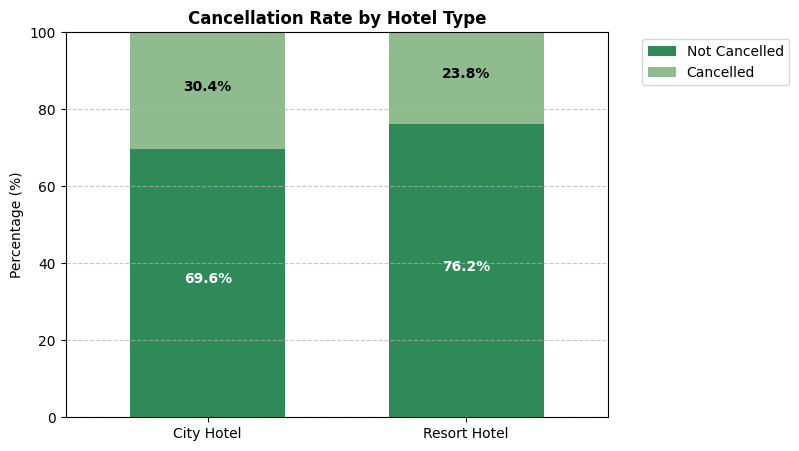

In [18]:
# Hitung jumlah booking per hotel berdasarkan is_canceled
agg_df = df.groupby("hotel")["is_canceled"].value_counts().unstack(fill_value=0)

# Ubah ke persentase
agg_df["Total"] = agg_df[0] + agg_df[1]
agg_df["Not Cancelled"] = (agg_df[0] / agg_df["Total"]) * 100
agg_df["Cancelled"] = (agg_df[1] / agg_df["Total"]) * 100
agg_df = agg_df[["Not Cancelled", "Cancelled"]]  # Ambil kolom persentase saja

# Warna
colors = ["#2E8B57", "#8FBC8F"]

# Plot Stacked Bar Chart
fig, ax = plt.subplots(figsize=(7, 5))
bars = agg_df.plot(kind="bar", stacked=True, color=colors, ax=ax, width=0.6)

# label angka di dalam bar dengan posisi yang lebih rapi
for i, (not_cancel, cancel) in enumerate(zip(agg_df["Not Cancelled"], agg_df["Cancelled"])):
    ax.text(i, not_cancel / 2, f"{not_cancel:.1f}%", ha="center", color="white", fontsize=10, fontweight="bold")
    ax.text(i, not_cancel + cancel / 2, f"{cancel:.1f}%", ha="center", color="black", fontsize=10, fontweight="bold")

# Format chart
ax.set_title("Cancellation Rate by Hotel Type", fontsize=12, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("Percentage (%)")
ax.set_xticklabels(agg_df.index, rotation=0)
ax.set_ylim(0, 100)
ax.legend(["Not Cancelled", "Cancelled"], loc="upper right", frameon=False)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend(["Not Cancelled", "Cancelled"], bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

## 2. Marketing Analysis per Room
[link text](https://www.bdc.ca/en/articles-tools/marketing-sales-export/marketing/what-average-marketing-budget-for-small-business#:~:text=1.-,Start%20by%20researching%20your%20industry,%E2%80%94between%205%20and%2010%25.)
We use 10% as percentage of marketing revenue

In [25]:
# DataFrame untuk revenue analysis
revenue_data = df[['hotel', 'adr']].copy()

# Menghitung biaya pemasaran per kamar (10% dari revenue per kamar)
revenue_data['cost_marketing_per_room'] = 0.10 * rev_data['adr'].abs()
revenue_data.head()

,hotel,adr,cost_marketing_per_room
2,Resort Hotel,75.0,7.5
3,Resort Hotel,75.0,7.5
4,Resort Hotel,98.0,9.8
6,Resort Hotel,107.0,10.7
7,Resort Hotel,103.0,10.3


In [26]:
# Rata-rata biaya marketing per kamar per hotel
avg_marketing = revenue_data.groupby('hotel')['cost_marketing_per_room'].mean()
print(avg_marketing)

# Rata-rata ADR sebelum marketing per hotel
avg_adr = revenue_data.groupby('hotel')['adr'].mean()
print(avg_adr)

# Rata-rata ADR setelah dikurangi biaya marketing per hotel
adr_after_marketing = avg_adr - avg_marketing
print(adr_after_marketing)

hotel
City Hotel      11.326922
Resort Hotel    10.111523
Name: cost_marketing_per_room, dtype: float64
hotel
City Hotel      113.269222
Resort Hotel    101.115233
Name: adr, dtype: float64
hotel
City Hotel      101.94230
Resort Hotel     91.00371
dtype: float64


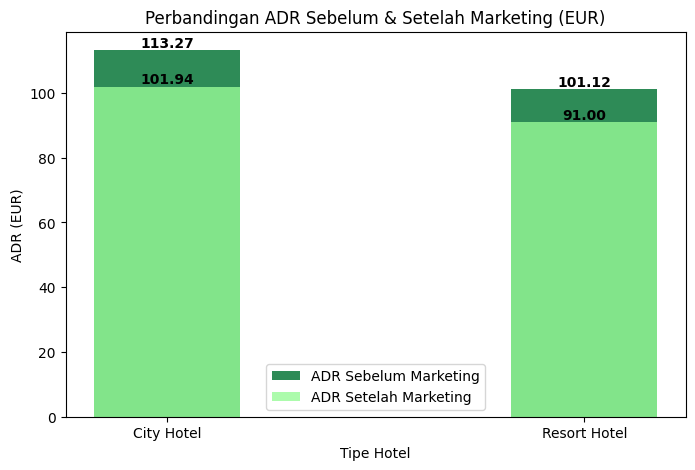

In [27]:
#Plotting
labels = avg_adr.index
adr_before = avg_adr.values  # ADR sebelum marketing
adr_after = adr_after_marketing.values  # ADR setelah marketing

# Bar chart
plt.figure(figsize=(8, 5))
bar_width = 0.35  # Lebar bar

# Plot ADR sebelum marketing
bars1 = plt.bar(labels, adr_before, width=bar_width, label='ADR Sebelum Marketing', color='#2E8B57')

# Plot ADR setelah marketing
bars2 = plt.bar(labels, adr_after, width=bar_width, label='ADR Setelah Marketing', color='#98FB98', alpha=0.8)

# Angka di atas barnya
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Label
plt.xlabel('Tipe Hotel')
plt.ylabel('ADR (EUR)')
plt.title('Perbandingan ADR Sebelum & Setelah Marketing (EUR)')
plt.legend()

plt.show()

In [28]:
print(revenue_data["cost_marketing_per_room"].min())

0.026000000000000002


In [29]:
print(f"Min cost_marketing_per_room: {rev_data['cost_marketing_per_room'].min()}")
print(f"Min adr: {revenue_data['adr'].min()}")

Min cost_marketing_per_room: 0.026000000000000002
Min adr: 0.26


In [30]:
from scipy.special import boxcox, inv_boxcox
from scipy import stats

def normaltransform(df,cols):
    """Function to find CI for mean (if the data distribution is not normal)

    Args:
        df : DataFrame
        cols (string) : name of your column

    Return:
        lower, upper of CI for mean
    """
    # values of Wine in df1
    x = df[cols]

    # box-cox transform
    xt, lmbda = stats.boxcox(x)

    # 95% confidence interval of mean in a transformed scale
    lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
    lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

    # inverse transform
    lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

    return lo_x, hi_x

In [31]:
# CI untuk biaya marketing per kamar
lowerMark, upperMark = normaltransform(rev_data, 'cost_marketing_per_room')
print(f"CI untuk biaya marketing per kamar: {lowerMark:.2f} - {upperMark:.2f} EUR")

# CI untuk ADR sebelum marketing
lowerADR, upperADR = normaltransform(rev_data, 'adr')
print(f"CI untuk ADR sebelum marketing: {lowerADR:.2f} - {upperADR:.2f} EUR")

CI untuk biaya marketing per kamar: 10.07 - 10.14 EUR
CI untuk ADR sebelum marketing: 100.72 - 101.36 EUR


## CUSTOMER LIVE VALUE
Mengetahui seberapa besar nilai pelanggan bagi hotel dalam jangka panjang.

In [33]:
# Rata - rata adr
avg_adr = df.groupby("hotel")['adr'].mean()

# Rata-rata lama menginap (total night per reservasi)
avg_stay_duration = df.groupby("hotel")[['stays_in_weekend_nights', 'stays_in_week_nights']].sum().sum(axis=1) / df.groupby("hotel").size()

# Rata-rata frekuensi pemesanan per tahun (repeat guest / total guest)
repeat_customers = df.groupby("hotel")['is_repeated_guest'].sum()
total_customers = df.groupby("hotel").size()
avg_booking_frequency = repeat_customers / total_customers

# Asumsi rata-rata retensi pelanggan, EX: 3 tahun
avg_customer_retention = 3

# CLV
CLV = avg_adr * avg_stay_duration * avg_booking_frequency * avg_customer_retention

# Menampilkan hasil CLV
print("Customer Lifetime Value (CLV) berdasarkan tipe hotel:")
print(CLV)

Customer Lifetime Value (CLV) berdasarkan tipe hotel:
hotel
City Hotel      27.773293
Resort Hotel    63.948146
dtype: float64


In [36]:
# Rata-rata revenue per booking berdasarkan tipe hotel
avg_adr = df.groupby("hotel")["adr"].mean()
avg_revenue_per_booking = avg_adr * (df.groupby("hotel")["stays_in_weekend_nights"].mean() + df.groupby("hotel")["stays_in_week_nights"].mean())

# CLV berdasarkan tipe hotel
clv_by_hotel = avg_revenue_per_booking * (df.groupby("hotel")["is_repeated_guest"].sum() / df.groupby("hotel")["is_repeated_guest"].count()) * 3

# Result
for hotel in clv_by_hotel.index:
    CLV = clv_by_hotel[hotel]
    avg_rev = avg_revenue_per_booking[hotel]

    # CLV condition
    if CLV > 2 * avg_rev:
        print(f"{hotel}: Revenue = {avg_rev:.2f} EUR, CLV = {CLV:.2f} EUR")
        print("CLV tinggi! Pelanggan sangat bernilai bagi hotel.")
    elif CLV < avg_rev:
        print(f"{hotel}: Revenue = {avg_rev:.2f} EUR, CLV = {CLV:.2f} EUR")
        print("CLV rendah. Pelanggan jarang kembali, perlu strategi retensi pelanggan.")
    else:
        print(f"{hotel}: Revenue = {avg_rev:.2f} EUR, CLV = {CLV:.2f} EUR")
        print("CLV sedang. Bisa ditingkatkan dengan program loyalitas.")

City Hotel: Revenue = 359.80 EUR, CLV = 27.77 EUR
CLV rendah. Pelanggan jarang kembali, perlu strategi retensi pelanggan.
Resort Hotel: Revenue = 449.94 EUR, CLV = 63.95 EUR
CLV rendah. Pelanggan jarang kembali, perlu strategi retensi pelanggan.


## OCCUPANCY RATE
Occupancy Rate= Total Available Room Nights/Total Room Nights Sold x 100%

In [37]:
# Filter data hanya untuk reservasi yang tidak dibatalkan
df_occupied = df[df["is_canceled"] == 0]

# Menghitung Total Room Nights Sold (jumlah malam yang benar-benar dihuni)
total_nights_sold = (df_occupied["stays_in_weekend_nights"] + df_occupied["stays_in_week_nights"]).sum()

# Menghitung rata-rata lama menginap untuk estimasi total nights tersedia
avg_nights_per_booking = df["stays_in_weekend_nights"].mean() + df["stays_in_week_nights"].mean()

# Estimasi total available room nights (jumlah booking x rata-rata lama menginap)
total_available_nights = len(df) * avg_nights_per_booking

# Menghitung Occupancy Rate
occupancy_rate = (total_nights_sold / total_available_nights) * 100

print(f" Occupancy Rate: {occupancy_rate:.2f}%")

 Occupancy Rate: 69.49%


In [38]:
# Filter hanya reservasi yang tidak dibatalkan
df_occupied = df[df["is_canceled"] == 0]

# Menghitung Total Room Nights Sold per tahun per tipe hotel
nights_sold_per_year = df_occupied.groupby(["arrival_date_year", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].sum().sum(axis=1)

# Menghitung rata-rata lama menginap per tipe hotel
avg_nights_per_booking = df.groupby(["arrival_date_year", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].mean().sum(axis=1)

# Menghitung jumlah booking per tahun per tipe hotel
total_bookings_per_year = df.groupby(["arrival_date_year", "hotel"]).size()

# Estimasi total available room nights per tahun per tipe hotel
available_nights_per_year = total_bookings_per_year * avg_nights_per_booking

# Menghitung Occupancy Rate per tahun per tipe hotel
occupancy_rate_per_year = (nights_sold_per_year / available_nights_per_year) * 100

print(occupancy_rate_per_year)


arrival_date_year  hotel       
2015               City Hotel      75.640753
                   Resort Hotel    79.037151
2016               City Hotel      67.037284
                   Resort Hotel    74.898078
2017               City Hotel      62.576715
                   Resort Hotel    67.369532
dtype: float64


In [39]:
print("is_canceled" in df.columns)

True


In [40]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [41]:
# Menghitung kapasitas kamar dari data asli
room_capacity = df_occupied.groupby("hotel")[["stays_in_weekend_nights", "stays_in_week_nights"]].sum().max()
print(room_capacity)

stays_in_weekend_nights    30799
stays_in_week_nights       79398
dtype: int64


#### A. OCCUPANCY RATE % per Tahun

In [43]:
# Filter hanya reservasi yang tidak dibatalkan
df_occupied = df[df["is_canceled"] == 0]

# Total Room Nights Sold per tahun & per hotel type
nights_sold = df_occupied.groupby(["arrival_date_year", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].sum().sum(axis=1)

# jumlah booking per tahun & per hotel type
total_bookings = df.groupby(["arrival_date_year", "hotel"]).size()

# Rata-rata lama menginap untuk estimasi total nights tersedia
avg_nights_per_booking = df.groupby(["arrival_date_year", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].mean().sum(axis=1)

# Estimasi total available room nights
available_nights = total_bookings * avg_nights_per_booking

# Occupancy Rate per tahun & per hotel type
occupancy_rate = (nights_sold / available_nights) * 100

# ADR per tahun & per hotel type
total_revenue = df_occupied.groupby(["arrival_date_year", "hotel"])["adr"].sum()
adr_per_year = total_revenue / nights_sold

# Reuslt
hotel_stats = pd.DataFrame({
    "Occupancy Rate (%)": occupancy_rate,"ADR (€)": adr_per_year}).reset_index()  # Tambahkan reset_index() agar kolom hotel tidak hilang

In [44]:
# Growth dibandingkan tahun sebelumnya untuk masing-masing hotel type
hotel_stats["Occupancy Growth (%)"] = hotel_stats.groupby("hotel")["Occupancy Rate (%)"].pct_change() * 100
hotel_stats["ADR Growth (%)"] = hotel_stats.groupby("hotel")["ADR (€)"].pct_change() * 100

# Menampilkan hasil
print(hotel_stats)

   arrival_date_year         hotel  Occupancy Rate (%)    ADR (€)  \
0               2015    City Hotel           75.640753  32.510141   
1               2015  Resort Hotel           79.037151  20.695650   
2               2016    City Hotel           67.037284  36.236737   
3               2016  Resort Hotel           74.898078  21.383603   
4               2017    City Hotel           62.576715  38.877041   
5               2017  Resort Hotel           67.369532  24.774795   

   Occupancy Growth (%)  ADR Growth (%)  
0                   NaN             NaN  
1                   NaN             NaN  
2            -11.374119       11.462871  
3             -5.236870        3.324142  
4             -6.653862        7.286263  
5            -10.051721       15.858845  


- Occupancy Rate menurun setiap tahun, terutama di City Hotel (-15% pada 2016, -16% pada 2017), menunjukkan berkurangnya tingkat occupancy.
- ADR meningkat signifikan di City Hotel (+75% pada 2016, +81% pada 2017), sementara di Resort Hotel cenderung fluktuatif.
- Resort Hotel lebih stabil dibanding City Hotel, dengan Occupancy Rate masih bertahan di 67%-79%, tetapi ADR mengalami penurunan besar pada 2016.

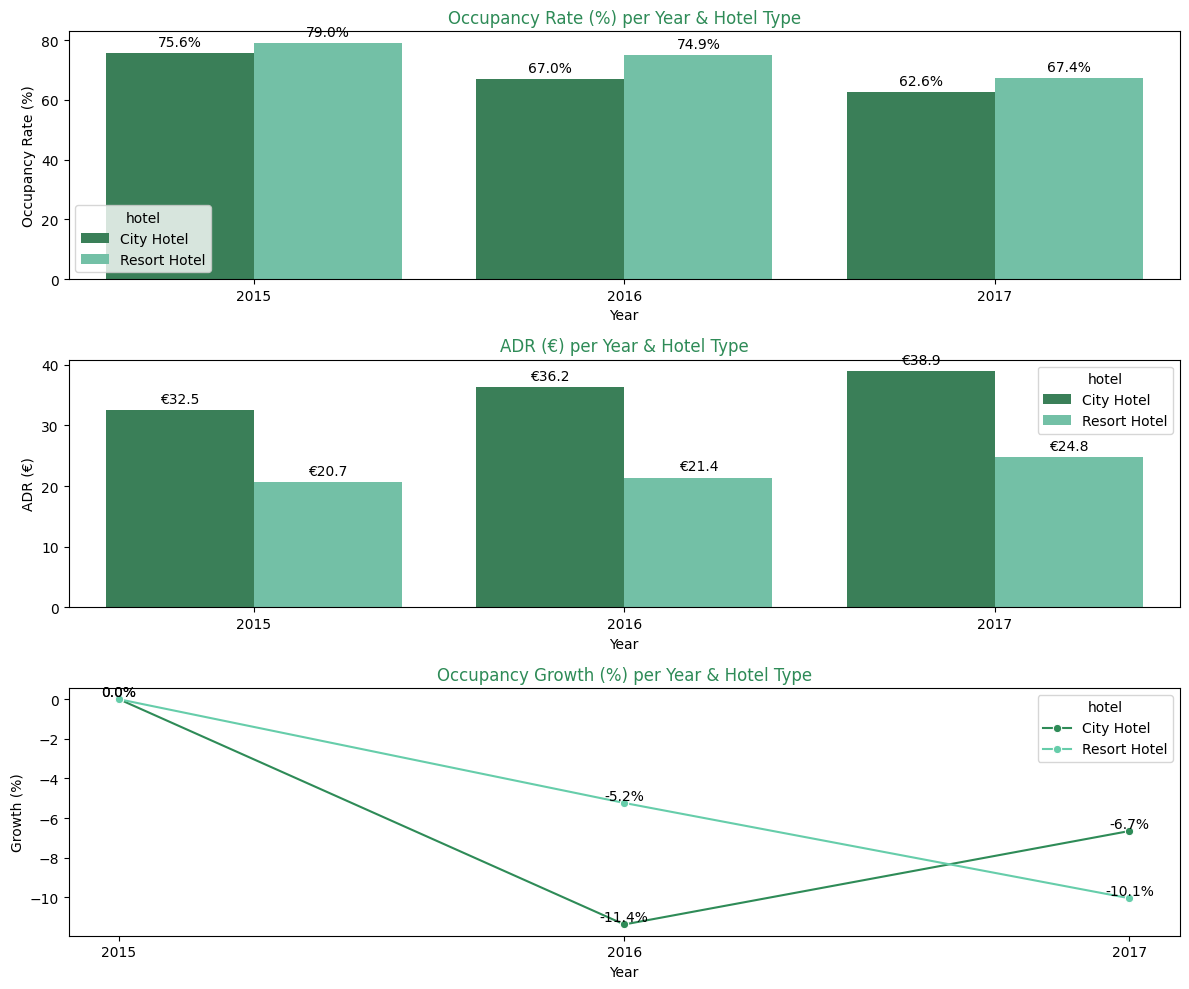

In [45]:
# Ubah ke integer dan isi NaN dengan 0
hotel_stats["arrival_date_year"] = hotel_stats["arrival_date_year"].astype(int)
hotel_stats = hotel_stats.fillna(0)

plt.figure(figsize=(12, 10))

# Bar Chart - Occupancy Rate
plt.subplot(3, 1, 1)
ax1 = sns.barplot(x="arrival_date_year", y="Occupancy Rate (%)", hue="hotel", data=hotel_stats, palette=["#2E8B57", "#66CDAA"])
plt.title("Occupancy Rate (%) per Year & Hotel Type", color="#2E8B57")
plt.xlabel("Year")
plt.ylabel("Occupancy Rate (%)")

# Angka di dalam bar
for p in ax1.containers:
    ax1.bar_label(p, fmt="%.1f%%", fontsize=10, padding=3)

#  Bar Chart - ADR (€)
plt.subplot(3, 1, 2)
ax2 = sns.barplot(x="arrival_date_year", y="ADR (€)", hue="hotel", data=hotel_stats, palette=["#2E8B57", "#66CDAA"])
plt.title("ADR (€) per Year & Hotel Type", color="#2E8B57")
plt.xlabel("Year")
plt.ylabel("ADR (€)")

# Angka di dalam bar
for p in ax2.containers:
    ax2.bar_label(p, fmt="€%.1f", fontsize=10, padding=3)

# Line Chart - Occupancy Growth (%)
plt.subplot(3, 1, 3)
ax3 = sns.lineplot(x="arrival_date_year", y="Occupancy Growth (%)", hue="hotel", marker="o", data=hotel_stats, palette=["#2E8B57", "#66CDAA"])
plt.title("Occupancy Growth (%) per Year & Hotel Type", color="#2E8B57")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.xticks(hotel_stats["arrival_date_year"].unique())  # Pastikan semua tahun muncul

# Angka dalam garis
for line in ax3.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        ax3.text(x_value, y_value, f"{y_value:.1f}%", ha="center", va="bottom", fontsize=10, color="black")

plt.tight_layout()
plt.show()

In [46]:
print(hotel_stats.dtypes)

arrival_date_year         int64
hotel                    object
Occupancy Rate (%)      float64
ADR (€)                 float64
Occupancy Growth (%)    float64
ADR Growth (%)          float64
dtype: object


#### B. OCCUPANCY RATE % per Month, untuk mengetahui Peak dan low season, serta off season

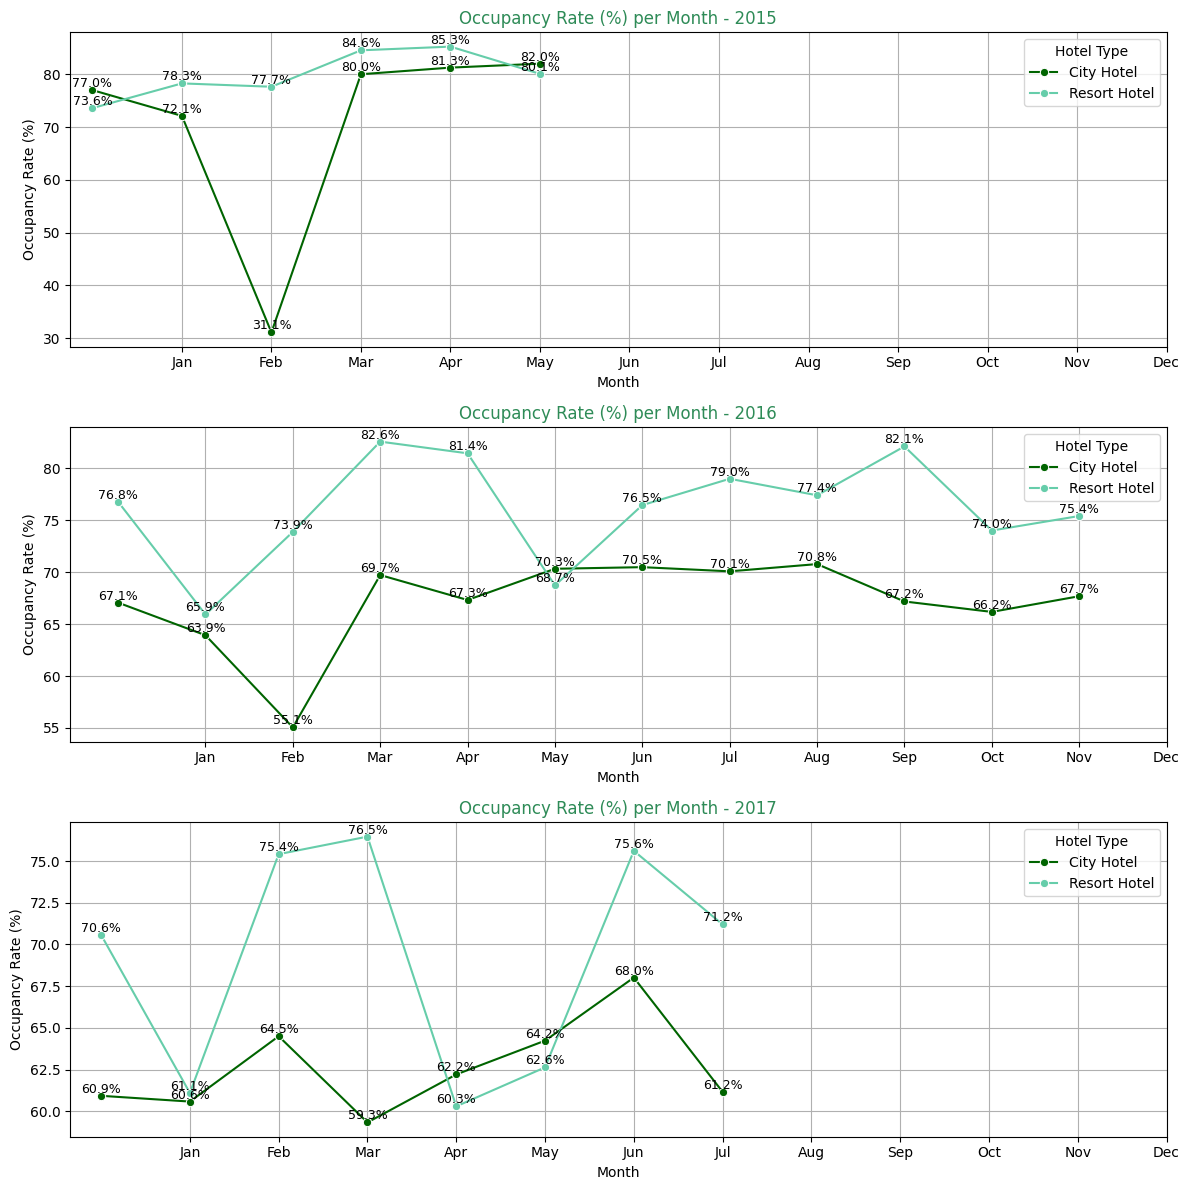

In [47]:
# Filter hanya reservasi yang tidak dibatalkan
df_occupied = df[df["is_canceled"] == 0]

# Occupancy Rate per bulan, tahun & tipe hotel
nights_sold_per_month = df_occupied.groupby(["arrival_date_year", "arrival_date_month", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].sum().sum(axis=1)
total_bookings_per_month = df.groupby(["arrival_date_year", "arrival_date_month", "hotel"]).size()
avg_nights_per_booking = df.groupby(["arrival_date_year", "arrival_date_month", "hotel"])[["stays_in_weekend_nights", "stays_in_week_nights"]].mean().sum(axis=1)
available_nights_per_month = total_bookings_per_month * avg_nights_per_booking
occupancy_rate_per_month = (nights_sold_per_month / available_nights_per_month) * 100

# Dataframe
seasonality_stats = occupancy_rate_per_month.reset_index()
seasonality_stats.columns = ["Year", "Month", "Hotel Type", "Occupancy Rate (%)"]

# Ukuran figure untuk 3 grafik
plt.figure(figsize=(12, 12))

# Loop untuk membuat 3 Line Chart (1 per tahun)
years = seasonality_stats["Year"].unique()
for i, year in enumerate(years, 1):
    plt.subplot(3, 1, i)
    data = seasonality_stats[seasonality_stats["Year"] == year]

    # line chart untuk City Hotel & Resort Hotel
    sns.lineplot(x="Month", y="Occupancy Rate (%)", hue="Hotel Type", data=data, marker="o",
                 palette={"City Hotel": "#006400", "Resort Hotel": "#66CDAA"})

    plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    plt.title(f"Occupancy Rate (%) per Month - {year}", fontsize=12, color="#2E8B57")
    plt.xlabel("Month")
    plt.ylabel("Occupancy Rate (%)")
    plt.grid(True)

    # value labels ddalam grafik
    for _, row in data.iterrows():
        plt.text(row["Month"], row["Occupancy Rate (%)"], f"{row['Occupancy Rate (%)']:.1f}%",
                 ha="center", va="bottom", fontsize=9, color="black")

plt.tight_layout()
plt.show()


- Peak Season (Sep-Nov)(awal musim gugur) terjadi pada 2015 & 2016, dengan Occcupancy tertinggi di Resort Hotel.
- Low Season (Apr-Jun)(musim semi - awal musim panas.) terjadi pada 2016 & 2017, dengan occupancy lebih rendah tetapi stabil.
- Off-Season (Des & Ags)(musim dingin, dan akhir musim panas) menunjukkan penurunan signifikan, terutama untuk City Hotel.

Resort Hotel lebih berubah - ubah (fluktuatif), sedangkan City Hotel lebih stabil sepanjang tahun.